Initialize data set

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import os # Used to interact with the file system


# Construct the path to the CSV file using the data directory
csv_path = ("dataset.csv")
csv_path2 = ("inflation.csv")


'''
                DATA INITLIZATION AND PROCESSING

'''

df = pd.read_csv(csv_path)
pd.DataFrame(df)
df.head
df.head(100)

inflation = pd.read_csv(csv_path2)
print(inflation.head(10))

pd.DataFrame(inflation)
inflation.head(100)


def currency_to_float(s):
    return int(s.replace('£', '').replace(',',''))

def convert_range_to_mean(df_column):
        # Remove the '$' and ',' characters from the input column
        
    df_column = df_column.str.replace('£', '').str.replace(',', '')
    
    # Split the input column into two parts based on the '-' character
    df_column = df_column.str.split('-', expand=True)
    
    # Convert the two parts into floats
    lower = df_column[0].astype(float)
    upper = df_column[1].astype(float)
    
    # Calculate the mean of the two parts
    mean = (lower + upper) / 2
    
    return mean

def convert_range_to_mean_mileage(df_column):
        # Remove the '$' and ',' characters from the input column
    mean_values = []
    
    for value in df_column:
        if isinstance(value, str):
            # If the value is a string, split it into two parts based on the '-' character
            value_parts = value.split('-')
            
            # Convert the two parts into floats
            lower = float(value_parts[0].strip().replace(' mpg', ''))
            if len(value_parts) > 1:
                upper = float(value_parts[1].strip().replace(' mpg', ''))
            else:
                upper = lower
            
            # Calculate the mean of the two parts
            mean_mpg = int((lower + upper) / 2)
            
            # Append the mean value to the list
            mean_values.append((mean_mpg))
        else:
            # If the value is not a string, assume it's a float and append it to the list followed by "mpg"
            mean_values.append((value))
    
    return mean_values

def inflate_prices(df, inflation):
    # Merge car_data and inflation_data on year and month columns
    merged_data = pd.merge(df, inflation, on=["year", "month"])

    # Apply inflation adjustment to price column
    merged_data["price_inflated"] = merged_data["New Price"] *(merged_data["HICP"].astype(int) / 100).round().astype(int)

    # Insert the new column into the original car dataframe
    df["price_inflated"] = merged_data["price_inflated"]

    return df

df.fillna(0,inplace =True)
df.replace('NaN',0,inplace =True)
df.replace('N/a',0,inplace =True)
df.replace('-','0',inplace =True)

inflation.fillna(0,inplace =True)
inflation.replace('NaN',0,inplace =True)
inflation.replace('N/a',0,inplace =True)
inflation.replace('-','0',inplace =True)

#fix year start to be a year and not range
df['Year start'] = df['Year start'].astype(str).str[:4].apply(lambda x: int(x) if len(x) >= 4 else x)
df = df.rename(columns={'Year start': 'year'})
# convert 'Production Start' to datetime format
df['Production start'] = pd.to_datetime(df['Production start'])

# extract month from 'Production Start' and create new 'Month' column
df['month'] = df['Production start'].dt.month



df['0-60 mph (secs)'] = df['0-60 mph (secs)'].astype(float).round().astype(int)
df['Torque (Nm)'] = df['Torque (Nm)'].astype(float).round().astype(int)
df['CO2 Emissions (g/km)'] = df['CO2 Emissions (g/km)'].astype(float).round().astype(int)
df['Cylinders'] = df['Cylinders'].astype(float).round().astype(int)

print(df['Power (bhp)'])
print(df.head())

print('before the functions: \n')
print(df['Fuel consumption (mpg)'])
print('\n')
print(df['Used price range'])

# prepare used price and mileage
df['Fuel consumption (mpg)'] = convert_range_to_mean_mileage(df['Fuel consumption (mpg)'])
df['Used price range'] = convert_range_to_mean(df['Used price range'])

print('after the functions: \n')
print(df['Fuel consumption (mpg)'])
print('\n')
print(df['Used price range'])
print('\n')

#Prepare New Price
df['New Price'] = df['New Price'].astype(str)  # convert column to string type
df['New Price'] = df['New Price'].apply(currency_to_float)
print(df['New Price'])


#split the month and year into workable columns
inflation['year'] = inflation['date'].str[:4].astype(int)
inflation['month'] = pd.to_datetime(inflation['date'], format='%Y%b').dt.month.astype(int)

#make a new price column to account for inflation
inflated_prices = inflate_prices(df, inflation)

# Print the updated car dataframe with the "price_inflated" column
print(inflated_prices.head())

#get inflation rate column
df.replace('nan',0,inplace =True)

df['inflation_rate'] = (df['price_inflated'] - df['New Price']) / df['New Price'].astype(float)
df.replace(np.NaN,0,inplace=True)

'''
            REMOVE COLUMNS WE WILL NOT BE USING
'''
df.columns = df.columns.str.strip()
df_modified = df = df.iloc[1:]  
df_modified = df.drop(['Fuel Type', 'Transmission', 'Gearbox', 'Drivetrain', 'Doors', 'EuroNCAP Rating','Status', 'Series (production years start-end)','Adult Occupant','Child Occupant', 'Make', 'Model', 'Trim / Version', 'Series launch year', 'Image URL', 'Miles per pound (mpp)','Year end','Production end','Annual road tax', 'EuroNCAP Rating description','Country', 'Production start','Pedestrian'], axis=1)


#df_modified.to_csv('newdataset.csv', index=False)



      date    HICP  \
0  2023Mar  122.36   
1  2023Feb  122.03   
2  2023Jan  121.30   
3  2022Dec  120.58   
4  2022Nov  121.10   
5  2022Oct  120.84   
6  2022Sep  119.18   
7  2022Aug  117.94   
8  2022Jul  117.24   
9  2022Jun  116.42   

  Euro area (changing composition) - HICP - Overall index, Monthly Index, European Central Bank, Working day and seasonally adjustedCollection:  \
0                                   Normal value (A)                                                                                              
1                                   Normal value (A)                                                                                              
2                                   Normal value (A)                                                                                              
3                                   Normal value (A)                                                                                              
4                     

In [12]:
df.head(4)

,Make,Model,Series launch year,Trim / Version,year,Year end,Production start,Production end,New Price,Used price range,...,New Child Occupant,New Vulnerable Road Users,New Safety Assist,Country,Status,Series (production years start-end),Image URL,month,price_inflated,inflation_rate
1,BMW,3-Series,Saloon 2019 specs,318d MHT SE Pro 4dr Step Auto,2021,2022,2021-03-01,03/01/2022,36985,26822.5,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,35435.0,-0.041909
2,BMW,3-Series,Saloon 2019 specs,318d SE Pro 4dr,2021,2022,2021-03-01,03/01/2022,35435,25430.0,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,38535.0,0.087484
3,BMW,3-Series,Saloon 2019 specs,320d MHT SE Pro 4dr Step Auto,2021,2022,2021-03-01,03/01/2022,38535,29250.0,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,40085.0,0.040223
4,BMW,3-Series,Saloon 2019 specs,320d xDrive MHT SE Pro 4dr Step Auto,2021,2022,2021-03-01,03/01/2022,40085,30615.0,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,33030.0,-0.176001


In [14]:
df.columns = df.columns.str.strip()
df_modified = df = df.iloc[1:]  
df_modified = df.drop(['Fuel Type', 'Transmission', 'Gearbox', 'Drivetrain', 'Doors', 'EuroNCAP Rating','Status', 'Series (production years start-end)','Adult Occupant','Child Occupant', 'Make', 'Model', 'Trim / Version', 'Series launch year', 'Image URL', 'Miles per pound (mpp)','Year end','Production end','Annual road tax', 'EuroNCAP Rating description','Country', 'Production start','Pedestrian'], axis=1)

In [16]:
df.head()

,Make,Model,Series launch year,Trim / Version,year,Year end,Production start,Production end,New Price,Used price range,...,New Child Occupant,New Vulnerable Road Users,New Safety Assist,Country,Status,Series (production years start-end),Image URL,month,price_inflated,inflation_rate
2,BMW,3-Series,Saloon 2019 specs,318d SE Pro 4dr,2021,2022,2021-03-01,03/01/2022,35435,25430.0,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,38535.0,0.087484
3,BMW,3-Series,Saloon 2019 specs,320d MHT SE Pro 4dr Step Auto,2021,2022,2021-03-01,03/01/2022,38535,29250.0,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,40085.0,0.040223
4,BMW,3-Series,Saloon 2019 specs,320d xDrive MHT SE Pro 4dr Step Auto,2021,2022,2021-03-01,03/01/2022,40085,30615.0,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,33030.0,-0.176001
5,BMW,3-Series,Saloon 2019 specs,318i SE Pro 4dr Step Auto,2021,2022,2021-03-01,03/01/2022,33030,26357.5,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,35425.0,0.072510
6,BMW,3-Series,Saloon 2019 specs,320i SE Pro 4dr Step Auto,2021,2022,2021-03-01,03/01/2022,35425,27312.5,...,0.87,0.87,0.76,Germany,production,BMW 3-Series Saloon (2019 onwards),https://parkers-images.bauersecure.com/pagefil...,3,37055.0,0.046013


Now that we have values to work with let us continue EDA 

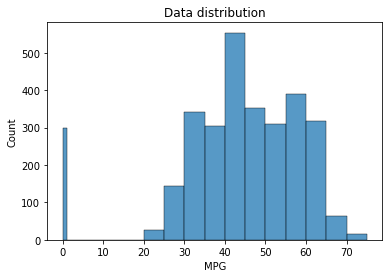

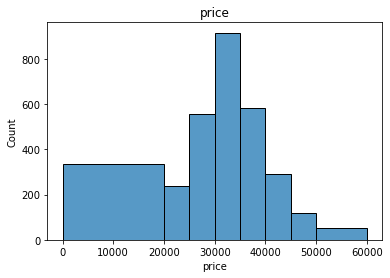

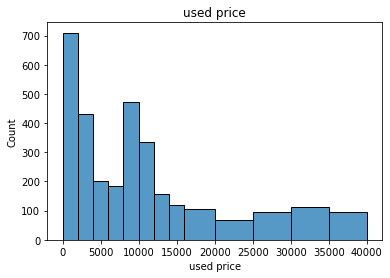

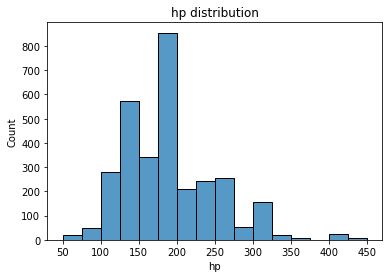

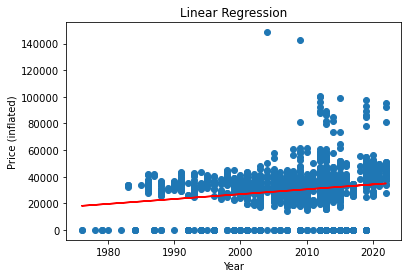

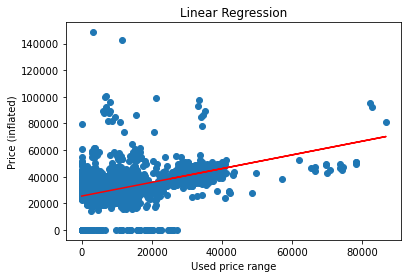

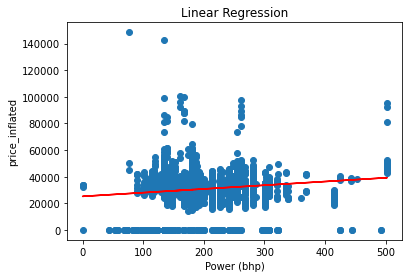

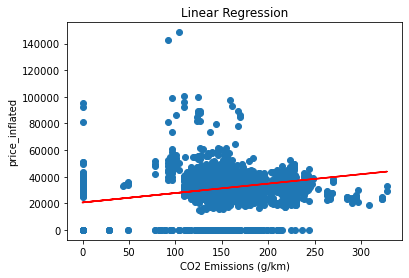

In [48]:
import numpy as np
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os # Used to interact with the file system

df4 = df_modified
bin_range = [0,1,2,3,4,5,6,7,10,15,20,25,30,35,40,45,50,55,60,65,70,75]

# Create the histogram using sns.histplot()
sns.histplot(data=df4, x='Fuel consumption (mpg)', bins=bin_range)
# Add axis labels and a title
plt.xlabel('MPG')
plt.ylabel('Count')
plt.title('Data distribution')

# Display the plot
plt.show()

bin_range = [0,20000,25000,30000,35000,40000,45000,50000,60000]

# Create the histogram using sns.histplot()

sns.histplot(data=df4, x='New Price', bins=bin_range)
# Add axis labels and a title
plt.xlabel('price')
plt.ylabel('Count')
plt.title('price')



# display the plot
plt.show()

bin_range = [0,2000,4000,6000,8000,10000,12000,14000,16000,20000,25000,30000,35000,40000]

# Create the histogram using sns.histplot()

sns.histplot(data=df4, x='Used price range', bins=bin_range)
# Add axis labels and a title
plt.xlabel('used price')
plt.ylabel('Count')
plt.title('used price')

# Display the plot
plt.show()

bin_range = [50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450]

# Create the histogram using sns.histplot()
df4['Power (bhp)'] = pd.to_numeric(df4['Power (bhp)'], errors='coerce')

# Apply the 'round()' method to the 'Power (bhp)' column
df4['Power (bhp)'] = df4['Power (bhp)'].round()

sns.histplot(data=df4, x='Power (bhp)', bins=bin_range)
# Add axis labels and a title
plt.xlabel('hp')
plt.ylabel('Count')
plt.title('hp distribution')

# Display the plot
plt.show()
#print("pair plot of the variables")
#sns.pairplot(df4)
#plt.show()
X = df4[['year']]
y = df4['price_inflated']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)
# Create a scatter plot of the data
plt.scatter(X, y)

# Add the regression line to the plot
plt.plot(X, model.predict(X), color='red')

# Set the plot title and axis labels
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price (inflated)')

# Show the plot
plt.show()

X = df4[['Used price range']]
y = df4['price_inflated']


# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)
# Create a scatter plot of the data
plt.scatter(X, y)

# Add the regression line to the plot
plt.plot(X, model.predict(X), color='red')

# Set the plot title and axis labels
plt.title('Linear Regression')
plt.xlabel('Used price range')
plt.ylabel('Price (inflated)')

# Show the plot
plt.show()

X = df4[['Power (bhp)']]
y = df4['price_inflated']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)
# Create a scatter plot of the data
plt.scatter(X, y)

# Add the regression line to the plot
plt.plot(X, model.predict(X), color='red')

# Set the plot title and axis labels
plt.title('Linear Regression')
plt.xlabel('Power (bhp)')
plt.ylabel('price_inflated')

# Show the plot
plt.show()

X = df4[['CO2 Emissions (g/km)']]
y = df4['price_inflated']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)
# Create a scatter plot of the data
plt.scatter(X, y)

# Add the regression line to the plot
plt.plot(X, model.predict(X), color='red')

# Set the plot title and axis labels
plt.title('Linear Regression')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('price_inflated')

# Show the plot
plt.show()


In [49]:
df.head()

,year,New Price,Used price range,Fuel consumption (mpg),Insurance group,Power (bhp),Top Speed (mph),0-60 mph (secs),Torque (Nm),Torque (ft-lb),...,Luggage Capacity (litres),Unbraked Towing Weight (kg),Braked Towing Weight (kg),New Adult Occupant,New Child Occupant,New Vulnerable Road Users,New Safety Assist,month,price_inflated,inflation_rate
2,2021,35435,25430.0,57,26,147,140,8,320,236,...,480,740,1600,0.97,0.87,0.87,0.76,3,38535.0,0.087484
3,2021,38535,29250.0,60,30,187,149,7,400,295,...,480,750,1600,0.97,0.87,0.87,0.76,3,40085.0,0.040223
4,2021,40085,30615.0,56,30,187,144,7,400,295,...,480,750,1800,0.97,0.87,0.87,0.76,3,33030.0,-0.176001
5,2021,33030,26357.5,43,24,153,139,8,250,184,...,480,750,1300,0.97,0.87,0.87,0.76,3,35425.0,0.072510
6,2021,35425,27312.5,43,28,181,146,7,300,221,...,480,750,1600,0.97,0.87,0.87,0.76,3,37055.0,0.046013


In [50]:
drop = df.drop(['Fuel Type', 'Transmission', 'Gearbox', 'Drivetrain', 'Doors' ,'EuroNCAP Rating description','EuroNCAP Rating', 'Status','Series (production years start-end)' ,'Make','Model','Trim / Version','Series launch year','Image URL','Miles per pound (mpp)', 'Year end', 'Production start', 'Production end','Annual road tax', 'Adult Occupant', 'Child Occupant', 'Pedestrian', 'Country'], axis = 1, inplace = True)
df = df[drop]


KeyError: "['Fuel Type' 'Transmission' 'Gearbox' 'Drivetrain' 'Doors'\n 'EuroNCAP Rating description' 'EuroNCAP Rating' 'Status'\n 'Series (production years start-end)' 'Make' 'Model' 'Trim / Version'\n 'Series launch year' 'Image URL' 'Miles per pound (mpp)' 'Year end'\n 'Production start' 'Production end' 'Annual road tax' 'Adult Occupant'\n 'Child Occupant' 'Pedestrian' 'Country'] not found in axis"

In [ ]:
# df.fillna(0,inplace =True)
# df.replace('NaN',0,inplace =True)
# df.replace('N/a',0,inplace =True)
# df.replace('-','0',inplace =True)

In [ ]:
df.head()

,year,New Price,Used price range,Fuel consumption (mpg),Insurance group,Power (bhp),Top Speed (mph),0-60 mph (secs),Torque (Nm),Torque (ft-lb),...,Luggage Capacity (litres),Unbraked Towing Weight (kg),Braked Towing Weight (kg),New Adult Occupant,New Child Occupant,New Vulnerable Road Users,New Safety Assist,month,price_inflated,inflation_rate
2,2021,35435,25430.0,57,26,147,140,8,320,236,...,480,740,1600,0.97,0.87,0.87,0.76,3,38535.0,0.087484
3,2021,38535,29250.0,60,30,187,149,7,400,295,...,480,750,1600,0.97,0.87,0.87,0.76,3,40085.0,0.040223
4,2021,40085,30615.0,56,30,187,144,7,400,295,...,480,750,1800,0.97,0.87,0.87,0.76,3,33030.0,-0.176001
5,2021,33030,26357.5,43,24,153,139,8,250,184,...,480,750,1300,0.97,0.87,0.87,0.76,3,35425.0,0.072510
6,2021,35425,27312.5,43,28,181,146,7,300,221,...,480,750,1600,0.97,0.87,0.87,0.76,3,37055.0,0.046013


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.pairplot(df)
# plt.show()

Correlation Analysis

Cylinders                    0.003480
Fuel consumption (mpg)       0.030464
New Safety Assist            0.262819
New Adult Occupant           0.278138
New Child Occupant           0.279416
New Vulnerable Road Users    0.286334
CO2 Emissions (g/km)         0.294293
month                        0.331563
0-60 mph (secs)              0.339023
Used price range             0.400617
New Price                    0.416705
Torque (Nm)                  0.437617
Engine Size (cc)             0.472436
inflation_rate               0.627341
price_inflated               1.000000
Name: price_inflated, dtype: float64


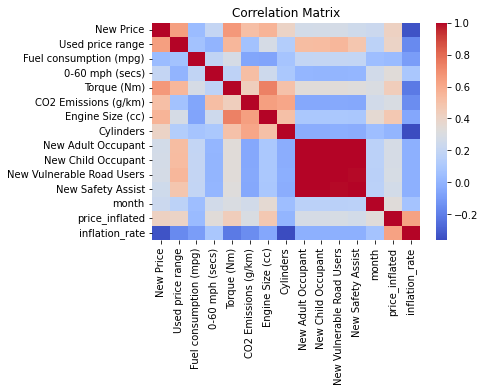

In [ ]:
# Compute correlation coefficients between features and target variable
correlations = df.corr()['price_inflated'].sort_values()

# Print correlation coefficients
print(correlations)

# Visualize correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

A correlation value ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation. As you can see from the data we have gathered, cylinders and fuel consumption are towards the bottom compared to inflation_rate and engine size. 

Feature Selection, will select top 10 important features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Split data into features and target
X = df.drop(['price_inflated'], axis=1)
y = df['price_inflated']

# Train model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Select top 10 features
selected_features = feature_importances.head(10).index.tolist()

print(selected_features)

['inflation_rate', 'Insurance group', 'Length (mm)', 'Engine Size (cc)', 'Used price range', 'New Price', 'Height (mm)', 'year', 'Power (bhp)', 'CO2 Emissions (g/km)']


Random forest regressor to determine feature importance, sorts the features by importance, and selects the top k features based on their importance. It then selects the top k features using the SelectKBest function and f_regression score function. In this case, we will choose 3 features that are good out of the result we got previously

In [ ]:
print("Top 4 Features")
print("Random forest regressor to determine feature importance, sorts the features by importance, and selects the top k features based on their importance.\n It then selects the top k features using the SelectKBest function and f_regression score function. In this case, we will choose 4 features that are good out of the result we got previously")
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression


# define X (input features) and y (target variable)
X = df[['inflation_rate', 'Insurance group', 'Length (mm)', 'Engine Size (cc)', 'Used price range', 'New Price', 'year', 'Height (mm)', 'Power (bhp)', 'CO2 Emissions (g/km)']]
y = df['price_inflated'] = pd.to_numeric(df['price_inflated'], errors='coerce')

# use random forest to determine feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# sort features by importance and select top k
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
k = 4
top_k_features = X.columns[indices][:k]

# select top k features using SelectKBest and f_regression
skb = SelectKBest(score_func=f_regression, k=k)
X_top_k = skb.fit_transform(X, y)
top_k_indices = np.argsort(skb.scores_)[::-1][:k]
top_k_features = X.columns[top_k_indices]

print("Top {} features: {}".format(k, top_k_features))

Top 4 Features
Random forest regressor to determine feature importance, sorts the features by importance, and selects the top k features based on their importance.
 It then selects the top k features using the SelectKBest function and f_regression score function. In this case, we will choose 4 features that are good out of the result we got previously
Top 4 features: Index(['inflation_rate', 'Insurance group', 'Length (mm)', 'Engine Size (cc)'], dtype='object')


Splitting the data sets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


print("Splitting Data Sets")

df2 = df_modified #get the processed dataframe
df2 = df2.iloc[1:]  

# Split the data into features and target
features = ['inflation_rate', 'Insurance group', 'Length (mm)', 'Engine Size (cc)']
target = 'price_inflated'
df2.replace(np.nan,0,inplace=True)
print(df2['inflation_rate'])
X = df2[features]
y = df2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Splitting Data Sets
3       0.040223
4      -0.176001
5       0.072510
6       0.046013
7       0.102820
          ...   
3119    0.000000
3120    0.000000
3121    0.000000
3122    0.000000
3123    0.000000
Name: inflation_rate, Length: 3121, dtype: float64
X_train shape: (2184, 4)
y_train shape: (2184,)
X_test shape: (937, 4)
y_test shape: (937,)


d:\AnacondaInstallation\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Linear Regression Model vs Random Forest Regression Model 


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
print("Linear Regression Model vs Random Forest Regression Model")
# Linear Regression Model vs Random Forest Regression Model

# Create a linear regression model
lin_model = LinearRegression()

# Fit the linear regression model to the training data
lin_model.fit(X_train, y_train)

# Make predictions on the testing data using the linear regression model
lin_y_pred = lin_model.predict(X_test)

# Calculate the mean squared error for the linear regression model
lin_mse = mean_squared_error(y_test, lin_y_pred)
print(f"Linear Regression - Mean squared error: {lin_mse:.2f}")

# Calculate the R-squared score for the linear regression model
lin_r2 = r2_score(y_test, lin_y_pred)
print(f"Linear Regression - R-squared score: {lin_r2:.2f}")

# Create a random forest regression model
rf_model = RandomForestRegressor()

# Fit the random forest regression model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data using the random forest regression model
rf_y_pred = rf_model.predict(X_test)

# Calculate the mean squared error for the random forest regression model
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f"Random Forest Regression - Mean squared error: {rf_mse:.2f}")

# Calculate the R-squared score for the random forest regression model
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Random Forest Regression - R-squared score: {rf_r2:.2f}")

Linear Regression Model vs Random Forest Regression Model
Linear Regression - Mean squared error: 61795968.02
Linear Regression - R-squared score: 0.72
Random Forest Regression - Mean squared error: 20425271.22
Random Forest Regression - R-squared score: 0.91


Training the Random Forest Regression Model with by tuning hyperparameters using Gridsearch

Testing First Hyperparameter

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

print("")
print("Training the Random Forest Regression Model with by tuning hyperparameters using Gridsearch")
print('Testing First Hyperparameter')

# Extract the features and target variable
features = ['inflation_rate', 'Insurance group', 'Length (mm)', 'Engine Size (cc)']
target = ['price_inflated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model with some hyperparameters
model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Predict the target values for the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model's performance using mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)


Training the Random Forest Regression Model with by tuning hyperparameters using Gridsearch
Testing First Hyperparameter
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean squared error:  27707484.62021199
R-squared score:  0.8761060168724575


Testing Second Hyperparameter

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
print('Testing Second Hyperparameter')
# Testing Second Hyperparameter

# Extract the features and target variable
features = ['inflation_rate', 'Insurance group', 'Length (mm)', 'Engine Size (cc)']
target = ['price_inflated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [5, 7, 9, 11],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model with some hyperparameters
model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Predict the target values for the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model's performance using mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

print("")

Testing Second Hyperparameter
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparameters:  {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean squared error:  21653351.368843593
R-squared score:  0.9031770662000377



Lets see if we can test another param that can get us a higher score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
print('Testing Third Hyperparameter')
# Third Hyperparameter
# Extract the features and target variable
features = ['inflation_rate', 'Insurance group', 'Length (mm)', 'Engine Size (cc)']
target = ['price_inflated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 7, 9, 11, 13],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the model with some hyperparameters
model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Predict the target values for the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model's performance using mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Testing Third Hyperparameter
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


KeyboardInterrupt: 

Evaluating the random regression model with the best hyperparameter 

In [ ]:
print("Evaluating the random regression model with the best hyperparameter")
# Evaluating the random regression model with the best hyperparameter 

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Evaluating the random regression model with the best hyperparameter
Mean squared error:  20076312.54106406
R-squared score:  0.9102287933632414


In [ ]:
print("Performance Metrics")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import UndefinedMetricWarning
import warnings
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

# fit the pipeline on the training data
pipe.fit(X_train, y_train)

# evaluate the model on the testing data
y_pred = pipe.predict(X_test)

# calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = pipe.score(X_test, y_test)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    precision = precision_score(y_test, y_pred.round(), average='weighted')
    recall = recall_score(y_test, y_pred.round(), average='weighted')
    f1 = f1_score(y_test, y_pred.round(), average='weighted')
# print the results
print("Mean squared error: ", mse)
print("R-squared score: ", r2)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
# apply regularization techniques
pipe_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=0.1))
])

scores = cross_val_score(pipe_reg, X_train, y_train, cv=5, scoring='r2')
print("R-squared score with Ridge regularization: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))




Performance Metrics
Mean squared error:  20895114.0060003
R-squared score:  0.9065675236279289
Accuracy:  0.9065675236279289
Precision:  0.12379935965848453
Recall:  0.11632870864461047
F1-score:  0.11994782402466501
R-squared score with Ridge regularization: 0.71 (+/- 0.14)
